## Hypothesis Testing

- Import all the necessary libraries

In [90]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats
import os
import xlrd

## Question 1: Z-Test (Parametric HT) Example problem statement:

- A passport office claims that the passport applications are processed within 30 days of submitting the application form and all necessary documents. The file passport.csv contains processing time of 40 passport applicants. The population standard deviation of the processing time is 12.5 days. Conduct a hypothesis test at significance level alpha = 0.05 to verify the claim made by the passport office.


- Solution: In this case, the population mean (claim made by passport office = 30 days) and standard deviation (=12.5 days) are known. The data set in passport.csv contains observations of actual processing time of 40 passports. We can calculate the mean of these observations and calculate Z-statistic. If calculated mean with Z test is greater than the given alpha, then it can be concluded that the processing time is less than 30 as claimed by passport office.

- Load the data and display the first 5 records from passport.csv

In [91]:
passport_df = pd.read_csv("passport.csv")
passport_df.head(5)

,processing_time
0,16.0
1,16.0
2,30.0
3,37.0
4,25.0


- Conducting Z-test for the above hypothesis test

In [92]:
import math 
def z_test(pop_mean, pop_std, sample):
    z_score = (sample.mean() - pop_mean)/(pop_std/math.sqrt(len(sample)))
    return z_score, stats.norm.cdf(z_score)
z_test(30, 12.5, passport_df.processing_time)

(-1.4925950555994747, 0.06777160919961511)

- The first value of he result is Z-statistic value or Z-score and second value is the corresponding p-value.
- Notice that p-value is more than 0.05.
- Since, 6.77% is greater than the significance value 5%, there is not enough evidence to reject null hypothesis.
- Hence, the null hypothesis is retained.

## Question 2: One sample T-test (Parametric HT): Example problem statement

- Aravind Productions (AP) is a newly formed movie production house based out of Mumbai, India. AP was interested in understanding the production cost required for producing Bollywood movie. The industry believes that the production house will require INR 500 million on average. It is assumed that the Bollywood movie production cost follows a normal distribution. The production costs of 40 Bollywood movies in millions of ruppes are given in bollywoodmovies.csv file. Conduct an appropriate hypothesis test at alpha = 0.05 to check whether the belief about average production cost is correct.

- Solution: The population mean is 500 and the sample set for actual production cost is available in the file bollywoodmovies.csv. The populatin standard deviation is not known.

- Reading Data:

In [93]:
bollywood_movies_df = pd.read_csv('bollywoodmovies.csv')
bollywood_movies_df.head(5)

,production_cost
0,601
1,627
2,330
3,364
4,562


- Defining the hypothesis:
- H<sub>0</sub>: mean = 500
- H<sub>A</sub>: mean != 500

- The built in function for this takes two parameters
    1. An array_like - sample observation
    2. Give popmean - expected value in null hypothesis

- conducting the test:

In [94]:
stats.ttest_1samp(bollywood_movies_df.production_cost, 500)

Ttest_1sampResult(statistic=-2.284553287266754, pvalue=0.0278625564067618)

- t-statistic value = -2.2845, and p-value = 0.02786
- p-value is less than 0.05
- Reject the null hypothesis

## Question 3: Two sample T-test example problem statement:

- A company claims that children who drink their health drink will grow taller than the children who do not drink that health drink. Data in the file healthdrink.xlsx shows average increase in height over one-year period from two groups: one drinking the health drink and the other not drinking the health drink. At alpha = 0.05, test whether the increase in height for the children who drink the health drink is different than those who do not drink health drink.


- Reading the data with the tab healthdrink_yes as parameter and then display first five records.

- xlrd has explicitly removed support for anything other than xls files. See: https://stackoverflow.com/questions/65254535/xlrd-biffh-xlrderror-excel-xlsx-file-not-supported
- Therefore, it is recommended to convert any xlsx files to csv files before proceeding.

In [95]:
healthdrink_yes_df = pd.read_csv('healthdrink_2.csv')
healthdrink_yes_df.head(5)

,height_increase
0,8.6
1,5.8
2,10.2
3,8.5
4,6.8


In [96]:
healthdrink_no_df = pd.read_csv('healthdrink.csv')
healthdrink_no_df.head(5)

,height_increase
0,5.3
1,9.0
2,5.7
3,5.5
4,5.4


- conducting the test:


In [97]:
stats.ttest_ind(healthdrink_yes_df['height_increase'], healthdrink_no_df['height_increase'])

Ttest_indResult(statistic=8.131675069083359, pvalue=1.197698592263946e-13)

## Question 4: Example problem statement for paired-sample T-test:

In [98]:
breakups_df = pd.read_csv('breakups.csv')

/usr/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


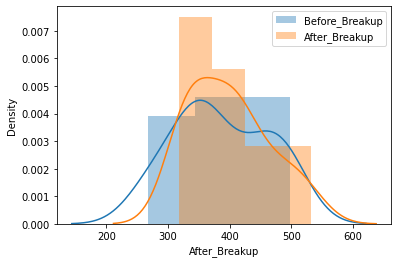

In [99]:
sn.distplot(breakups_df['Before_Breakup'], label = 'Before_Breakup')
sn.distplot(breakups_df['After_Breakup'], label = 'After_Breakup')
plt.legend()

In [100]:
stats.ttest_rel(breakups_df['Before_Breakup'], breakups_df['After_Breakup'])


Ttest_relResult(statistic=-0.5375404241815105, pvalue=0.5971346738292477)

## Question 5: ANOVA (Analysis of Variance)

In [101]:
onestop_df = pd.read_csv('onestop.csv')


/usr/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
 

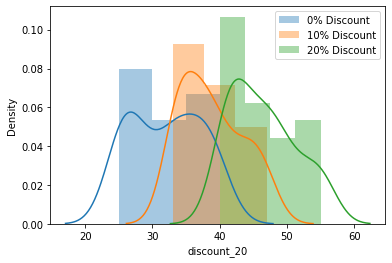

In [102]:
sn.distplot(onestop_df['discount_0'], label = '0% Discount')
sn.distplot(onestop_df['discount_10'], label = '10% Discount')
sn.distplot(onestop_df['discount_20'], label = '20% Discount')
plt.legend()

In [103]:
from scipy.stats import f_oneway


f_oneway(onestop_df['discount_0'], onestop_df['discount_10'], onestop_df['discount_20'])

# F_onewayResult(statistic=65.8698, pvalue=0.00)

F_onewayResult(statistic=65.86986401283694, pvalue=3.821500669725641e-18)

- pvalue is less than 0.05 value.
- we reject the null hypothesis.
- i.e. the mean sales quantity values are different under different discounts.